here we import all of the necessary libraries in order for the code to run properly

In [ ]:
#importing all the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from google.colab import files
import io




here we initiate the importing codes 



In [ ]:
uploaded = files.upload()

uploaded1 = files.upload()



Saving initialdatasetp (2).csv to initialdatasetp (2).csv


Saving initialdatasetk1.csv to initialdatasetk1.csv


In [ ]:
#defining a function that predicts the accuracy of the model (a good performing model should have outputs between 0.5 and 1)
def predictive_power(actual,predicted):
  sum, num, den = 0, 0, 0
  for i in range(0, len(actual), 1):
    sum += actual[i]
  actual_avg = sum/len(actual)
  for i in range(0, len(actual), 1):
    num += (actual[i] - predicted[i])**2
    den += (actual[i] - actual_avg)**2
  return (1-num/den)

#loading the data file into a dataframe names 'data'
datap = pd.read_csv(io.BytesIO(uploaded['initialdatasetp (2).csv']))
datak = pd.read_csv(io.BytesIO(uploaded1['initialdatasetk1.csv'])) 

#shape(rows, columns) of the dataframe are extracted into a variable named 'shape'
shapep = datap.shape
shapek = datak.shape

print(f"Total number of elements covered are: {shapep[0]}")
print(f"Total number of parameters evaluated for each shape are: {shapep[1]+shapek[1]}")
#print(f"\nThe data summary for first five elements along with its parameters are given below:\n")
#print(f"{data.head()}\n\n")

#Dividing the available data into inputs and outputs (Xp and Xk are inputs for p and k models respectively - p and k are the outputs for the p and k models respectively)
Xp = datap.iloc[:, 1:16].values
p = datap.iloc[:, -1].values
Xk = datak.iloc[:, 1:24].values
k = datak.iloc[:, -1].values

#Dividing the input and output data further into train (80%) and test (20%) sets 
Xp_train, Xp_test, p_train, p_test = train_test_split(Xp, p, test_size=0.2, random_state=0)
Xk_train, Xk_test, k_train, k_test = train_test_split(Xk, k, test_size=0.1, random_state=0)

#Predicting K Values
k_randomforestregressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
k_randomforestregressor.fit(Xk_train, k_train)
k_rf = k_randomforestregressor.predict(Xk_test)
kTrain_rf = k_randomforestregressor.predict(Xk_train)
k_rf_comparison = pd.DataFrame({'Experimental K': k_test, 'Random Forest Predicted K': k_rf})
print(k_rf_comparison)
print(f"Predictive power of Random Forest Regression Model is {predictive_power(k_test,k_rf)}\n\n")

#Using K-Nearest Neighbours Model to predict p and k values
print("Machine Learning Model 4: Using K Nearest Neighbours")
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xppca_train = sc.fit_transform(Xp_train)
Xppca_test = sc.transform(Xp_test)
Xkpca_train = sc.fit_transform(Xk_train)
Xkpca_test = sc.transform(Xk_test)
from sklearn.decomposition import PCA
pca = PCA(n_components = 10) 
Xppca_train = pca.fit_transform(Xppca_train)
Xppca_test = pca.transform(Xppca_test)
Xkpca_train = pca.fit_transform(Xkpca_train)
Xkpca_test = pca.transform(Xkpca_test)
  #Predicting p values
p_knn_classifier = neighbors.KNeighborsRegressor(n_neighbors = 1)
p_knn_classifier.fit(Xppca_train, p_train)
knn_p = p_knn_classifier.predict(Xppca_test)
knn_pTrain = p_knn_classifier.predict(Xppca_train) #p-train
p_knn_comparison = pd.DataFrame({'Experimental P': p_test, 'KNN Predicted P': knn_p})
print(p_knn_comparison)
print(f"Predictive power of P K-Nearest Neighbour Model is {predictive_power(p_test,knn_p)}\n")

#predicting K Values.
k_knn_classifier = neighbors.KNeighborsRegressor(n_neighbors = 1)
k_knn_classifier.fit(Xkpca_train, k_train)
k_knnTrain = k_knn_classifier.predict(Xkpca_train)
knn_k = k_knn_classifier.predict(Xkpca_test)
k_knn_comparison = pd.DataFrame({'Experimental K': k_test, 'KNN Predicted K': knn_k})
print(k_knn_comparison)
print(f"Predictive power of K K-Nearest Neighbour Model is {predictive_power(k_test,knn_k)}\n\n")







Total number of elements covered are: 42
Total number of parameters evaluated for each shape are: 44
   Experimental K  Random Forest Predicted K
0              96                     128.86
1             205                     167.62
2             263                     235.44
3             197                     156.01
Predictive power of Random Forest Regression Model is 0.6594734516492078


Machine Learning Model 4: Using K Nearest Neighbours
   Experimental P  KNN Predicted P
0             8.2              8.5
1             9.0              8.0
2             8.8              8.8
3             9.4              9.3
4             8.5              8.5
5            10.5             10.5
6             8.8              9.5
7             9.1              9.3
8             6.9              6.9
Predictive power of P K-Nearest Neighbour Model is 0.7809139784946236

   Experimental K  KNN Predicted K
0              96             96.0
1             205            212.0
2             263   

now we plot the cross validation relationships 

here we ask the user to a set of values to input inorder to predict its behaviour

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

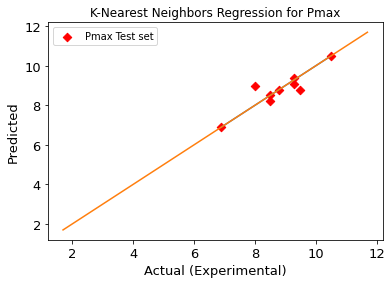

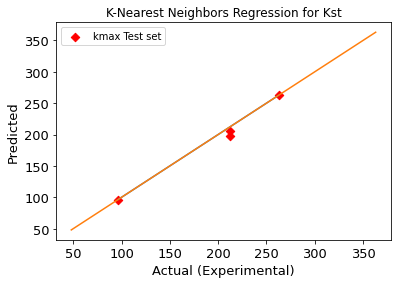

In [ ]:
#print(len(lr_predicted_p))
#print(len(p_test))

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#the code below is to show the comparison diagrams for the KNN model of the pmax values.
fig, ax = plt.subplots()
ax.plot([p_test.min(), p_test.max()],[p_test.min(), p_test.max()])
ax.plot([p_train.min(),p_train.max()],[p_train.min(),p_train.max()])
ax.scatter(knn_p, p_test, marker="D", c="red", label = "Pmax Test set" )
#ax.scatter(knn_pTrain, p_train,marker="o", c="blue",label="Pmax Train set")
plt.title("K-Nearest Neighbors Regression for Pmax")
plt.ylabel("Predicted", fontsize =13)
plt.xlabel("Actual (Experimental)", fontsize=13)
ax.legend()
mpl.rc('xtick',labelsize= 13)
mpl.rc("ytick", labelsize= 13)





fig1, ax1 = plt.subplots()
ax1.plot([k_test.min(), k_test.max()],[k_test.min(), k_test.max()])
ax1.plot([k_train.min(),k_train.max()],[k_train.min(),k_train.max()])
ax1.scatter(knn_k, k_test, marker="D", c="red", label = "kmax Test set" )
#ax.scatter(k_knnTrain, k_train,marker="o", c="blue",label="Pmax Train set")
plt.title("K-Nearest Neighbors Regression for Kst")
plt.ylabel("Predicted", fontsize =13)
plt.xlabel("Actual (Experimental)", fontsize=13)
ax1.legend()
mpl.rc('xtick',labelsize= 13)
mpl.rc("ytick", labelsize= 13)
'''
#the code below is to show the comparison diagram for the Random forest testing for the kst values.
fig1,ax1 = plt.subplots()
ax1.plot([k_test.min(), k_test.max()],[k_test.min(), k_test.max()])
ax1.plot([k_train.min(),k_train.max()],[k_train.min(),k_train.max()])
ax1.scatter(k_rf, k_test, marker="D", c="red", label = "Kst Test set")
ax1.scatter(kTrain_rf, k_train, marker ="o", c="blue",label="Kst Train set")
ax1.legend()
plt.title("Random Forest Regression")

plt.ylabel("Predicted",fontsize=13)
plt.xlabel("Actual (Experimental)", fontsize= 13)'''
fig.savefig("pmax plots.pdf")
#plt.ylabel("Predicted")
fig1.savefig("kst plots.pdf")
files.download("pmax plots.pdf")
files.download("kst plots.pdf")


In [ ]:

  listval = []
  response = input(" predict K or P? ")
  if response  == "k" or "K":
    x = input("input size of Chemical")
    listval.append(x)

    x = input("input the diameter of the dust particle")
    listval.append(x)

    x = input("input Harary 3D value")
    listval.append(x)

    x = input("input SPAN value")
    listval.append(x)

    x = input("input  ")
    listval.append(x)

    x = input("input size")
    listval.append(x)

    x = input("input size")
    listval.append(x)

    x = input("input size")
    listval.append(x)

    x = input("input size")
    listval.append(x)

    x = input("input size")
    listval.append(x)

    x = input("input size")
    listval.append(x)

    x = input("input size")
    listval.append(x)

    x = input("input size")
    listval.append(x)
  
    